In [19]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading Data
dataset =load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] =pd.to_datetime(df['job_posted_date'])

import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [ ]:
df_exploded= df.explode('job_skills')
df_exploded

In [52]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')
skills_count = skills_count.sort_values(by= 'skill_count', ascending = False)
most_popular_skill = skills_count.drop_duplicates (subset = ['job_title_short'])

In [44]:
most_popular_skill

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
625,Data Analyst,sql,92428
1725,Senior Data Engineer,python,28884
1940,Senior Data Scientist,python,25915
1534,Senior Data Analyst,sql,17709
179,Business Analyst,sql,17346
2172,Software Engineer,python,15254
1295,Machine Learning Engineer,python,9677
364,Cloud Engineer,python,3116


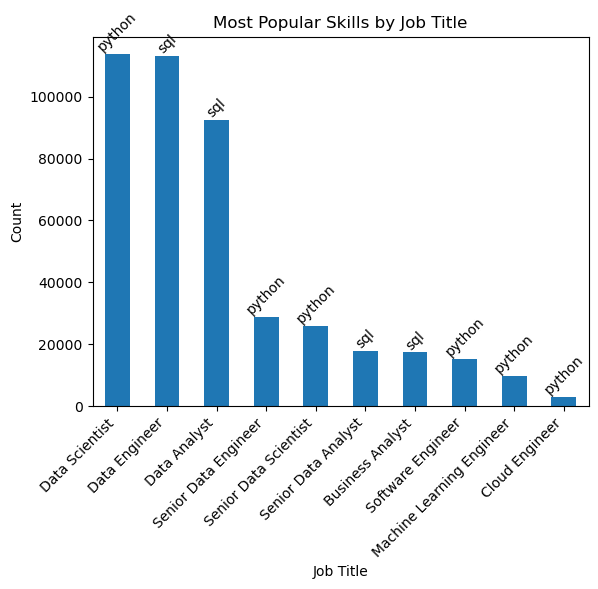

In [46]:
import matplotlib.pyplot as plt

ax = most_popular_skill.plot(kind='bar', x='job_title_short', y='skill_count', legend=False)

# Add skill name labels on top of each bar
for i, p in enumerate(ax.patches):
    skill_name = most_popular_skill.iloc[i]['job_skills']  # Get the most popular skill
    ax.annotate(skill_name, 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, rotation=45)

plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Most Popular Skills by Job Title')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.show()


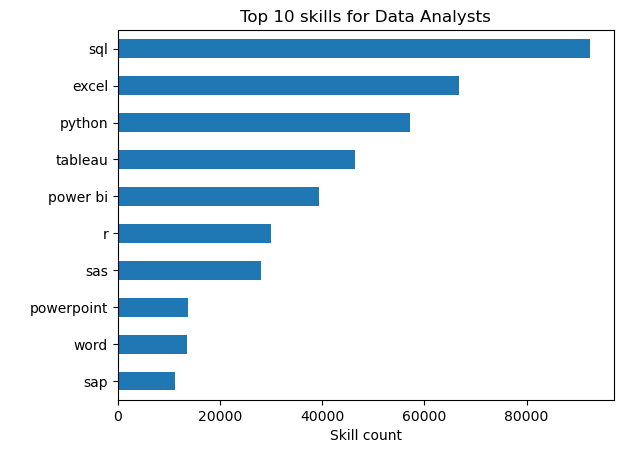

In [62]:
job_title = 'Data Analyst'
top_skills = 10

df_skill_final =  skills_count[skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final.plot(kind='barh',x= 'job_skills')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job_title}s')
plt.xlabel('Skill count')
plt.ylabel(' ')
plt.legend().set_visible(False)
plt.show()


In [38]:
df['job_title_short'].unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [37]:
skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


<Axes: xlabel='job_skills'>

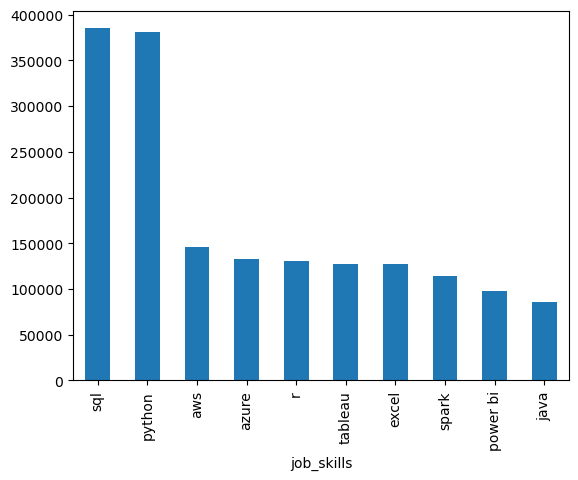

In [21]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')